In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

In [2]:
n_samples= 10000

'''generate a dataset distributed at different coreners of a graph
   sklearn includes a library that we can use to create a dataset 
'''
centers=[(0.9,0.05),(0.05,0.94)]
x,y=make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4, centers=centers, shuffle=False, random_state=42)

make_blob options | description
- | -
n_samples | it is the total number of points equally divided among clusters
n_features | The number of features for each sample
centers | The number of centers to generate, or the fixed center locations
cluster_std | The standard deviation of the clusters
random_state | Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls

[Scikit Reference](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

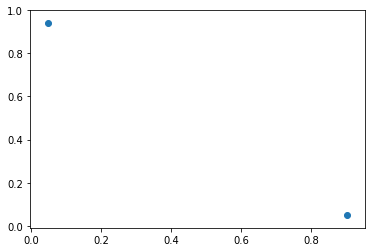

In [3]:
plt.scatter(centers[0], centers[1])
plt.show()

In [4]:
plt.show(centers)

In [5]:
x[:5]

array([[ 1.09868566, -0.00530572],
       [ 1.15907542,  0.65921194],
       [ 0.80633865, -0.04365478],
       [ 1.53168513,  0.35697389],
       [ 0.71221025,  0.26702402]])

In [6]:
x.shape

(10000, 2)

In [7]:
y[:5]

array([0, 0, 0, 0, 0])

In [8]:
y.shape

(10000,)

In [9]:
features=[]
labels=[]

for feature, label in zip(x,y):
    if (feature[0]>=0 and feature[0]<=1.0 and feature[1]>=0 and feature[1]<=1.0):
        features.append(feature)
        labels.append(label)

x=np.array(features)
y=np.array(labels)

### Visualize Fabricated Dataset

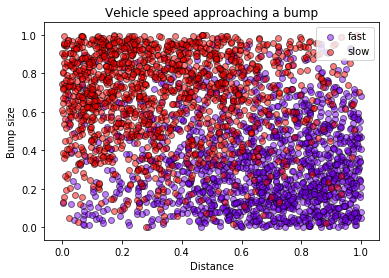

In [10]:
plt.figure()
y_unique=np.unique(y)
class_names=['fast','slow']
colors=cm.rainbow(np.linspace(0.0,1.0, y_unique.size))
for this_y, color in zip(y_unique,colors):
    this_x=x[y == this_y]
    plt.scatter(this_x[:,0], this_x[:,1], c=color,alpha=0.5, 
                edgecolor='k', label=class_names[this_y])
    
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Bump size')
plt.title('Vehicle speed approaching a bump')
plt.show()

matplotlib | description
-|-
cm.rainbow | Create a color-map with a different color for each class
np.linspace | Return evenly spaced numbers over a specified interval (start,stop,num); np.linspace / Return evenly spaced numbers over a specified interval (start,stop,num);


In [11]:
from sklearn import linear_model

logred = linear_model.LogisticRegression(C=1.0)
logred.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

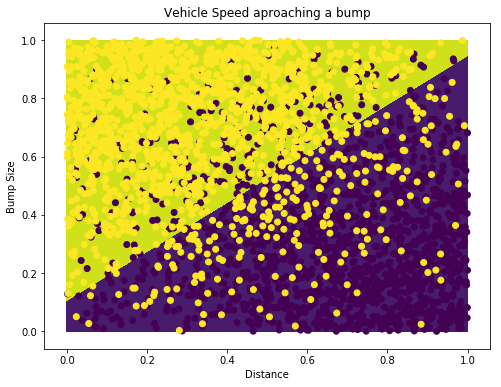

In [12]:
def plotpredictions(clf):
    
    xx,yy =np.meshgrid(np.arange(0,1.0,0.001),
                      np.arange(0,1.0,0.001))
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    plt.figure(figsize=(8,6))
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z, cmp=plt.cm.Paired, aplha=0.8)
    plt.scatter(x[:,0],x[:,1], c=y.astype(np.float))
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title("Vehicle Speed aproaching a bump")
    plt.show()
    
plotpredictions(logred)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 

logred.fit(x_train,y_train)
logred.score(x_test,y_test)

0.839344262295082

In [14]:
from sklearn.model_selection import cross_val_score

fold_scores=cross_val_score(logred, x, y, cv=5)
print('Fold Scores: ',fold_scores)
print('Mean all the fold scored: ',np.mean(fold_scores))

Fold Scores:  [0.86885246 0.84098361 0.8407225  0.82758621 0.83415435]
Mean all the fold scored:  0.8424598239521925
